# Video: Physics and Time Series

This video uses physics examples to illustrate dimensionality reductions to just time series in certain circumstances.

Script:
* Suppose you are taking a physics class and you are asked to describe the position of a frictionless sphere over time.
* You are given the initial position, velocity, and acceleration of the sphere.
* Can you calculate the position and velocity of the sphere later?

## A Basic Physics Problem

* At time zero, the sphere is at height 5 meters and at rest, so the velocity is zero.
* The sphere accelerates towards the ground at 9.8 meters per second squared.

Script:
* For simplified problems, this is quite easy, and we can write functions taking our initial conditions, such as starting at rest 5m above the ground, and apply the acceleration to derive the future position and velocity of the sphere.

## A Basic Physics Problem

* $\mathbf{x}(t)$ is the position of the sphere at time $t$.
* $\mathbf{v}(t)$ is the velocity of the sphere at time $t$.


Script:
* We will describe the position and velocity of the sphere as two functions of time.
* $\mathbf{x}(t)$ and $\mathbf{v}(t)$.
* Both functions take in a single input $t$ representing time, and return a vector.
* For $\mathbf{x}(t)$, that vector is the position of the sphere at time $t$, and depending on the problem, may have 1-3 dimensions.
* For $\mathbf{v}(t)$, that vector is the velocity of the sphere.
* In other words, $\mathbf{v}(t)$ has the speed and direction that the sphere is moving at time $t$, or to use our usual vector vocabularity, it has the magnitude and direction of the sphere's movement at time $t$.
* For this very simple example, we can derive $\mathbf{v}(t)$ from the acceleration given.
* And then we can derive $\mathbf{x}(t)$ from $\mathbf{v}(t)$.

## Position and Velocity over Time


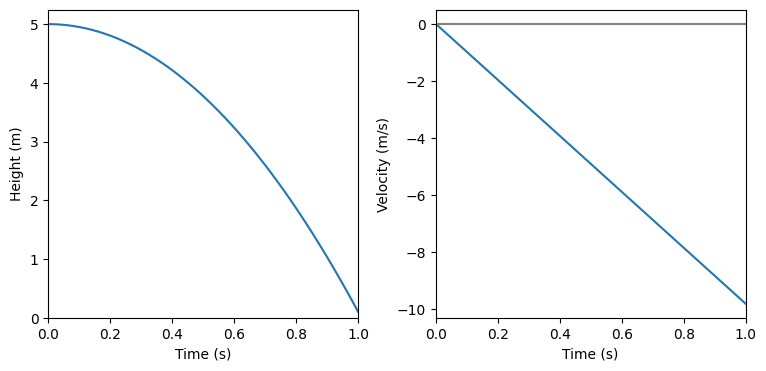

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ts = np.linspace(0, 1)

plt.figure(figsize=(9,4))

plt.subplot(1, 2, 1)
plt.plot(ts, 5 - 4.9 * ts ** 2)
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

plt.subplot(1, 2, 2)
plt.plot(ts, 0 - 9.8 * ts)
plt.gca().set_xlim(0, 1)
plt.axhline(y=0, color="grey")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.subplots_adjust(wspace=0.25)

None

Script:
* Equations for these charts are easy to derive for simple physics problems, and pretty to fit with a model with one input $t$.
* This means that this system can be simply encoded with just $t$ as a latent variable giving a non-linear encoding of position and velocity.
* Real, interesting examples will be much more complicated of course.
* For example, you can see that our sphere is about to hit the ground at time 1.

## More Realistic Positions over Time


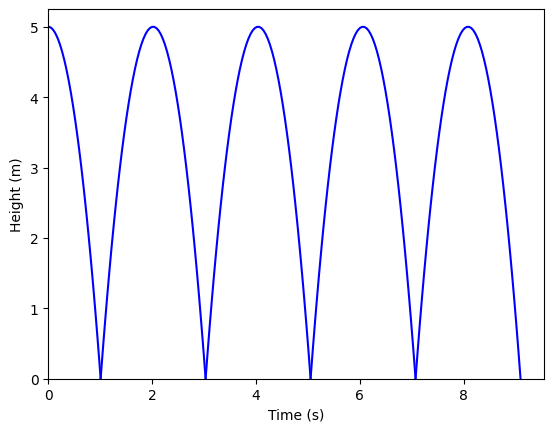

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

period = np.sqrt(5/4.9)
ts1 = np.linspace(0, period)

plt.plot(ts1, 5 - 4.9 * ts1 ** 2, color="blue")
for i in range(1, 5):
    tsx = np.linspace(period * (2 * i - 1), period * (2 * i + 1))
    plt.plot(tsx, (5 - 4.9 * (tsx - 2 * i * period) ** 2), color="blue")

plt.gca().set_xlim(0)
plt.gca().set_ylim(0)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")


None

Script:
* So the neat formulas will only describe segments of time.
* And some of the energy will be absorbed after each collision, so those formulas will adjust by more than an offset each time.

## Even More Realistic Positions over Time


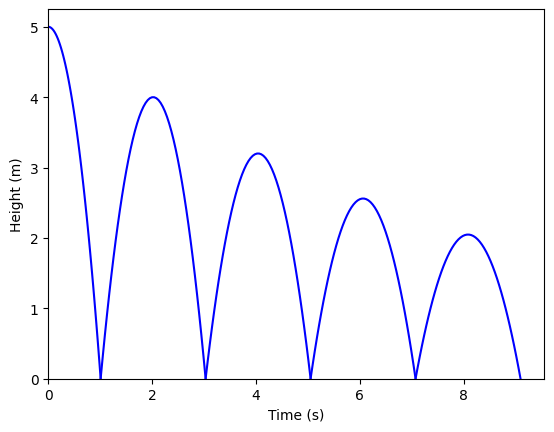

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

period = np.sqrt(5/4.9)
ts1 = np.linspace(0, period)

plt.plot(ts1, 5 - 4.9 * ts1 ** 2, color="blue")
for i in range(1, 5):
    tsx = np.linspace(period * (2 * i - 1), period * (2 * i + 1))
    plt.plot(tsx, (5 - 4.9 * (tsx - 2 * i * period) ** 2) * 0.8**i, color="blue")
plt.gca().set_xlim(0)
plt.gca().set_ylim(0)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")


None

Script:
* But at least in principal, there is a straightforward piecewise derivation of the behavior of $\mathbf{x}(t)$ at any time $t$.
* This is generally possible if we know all the factors in play and can eliminate sources of noise in our modeling.
* So in physics and many time series problems, we can boil down the whole problem to predictions as a function of one input time, and if we are given a time, we can figure out all the other values at the time.